# In Class: ggplot I

## Loading packages and data

Now thay we are all experts in dplyr and ggplot2, we will use our knowledge to analyze some real world data about the COVID-19 pandemic in the US. Our goal is to compare case numbers, testing and fatality rates between several US states.
First we will load out libraries and data:

In [1]:
library(tidyverse)
options(repr.plot.width=10, repr.plot.height=3) #set size for plots in this notebook

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Next we will load the data. The file "all-states-history.csv" contains daily reported data from each state which we have already downloaded for you from https://covidtracking.com/.
The file is in .csv format, luckily R has a built in function to load .csv file. Use the code below to load this data and convert it as before to tibble.

In [2]:
data <- read.csv('all-states-history.csv')
data = as_tibble(data)
head(data)

date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,⋯,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2021-02-17,AK,288,NA,1,NA,1238,1238,32,5,⋯,1611971,6144,NA,NA,NA,NA,NA,0,1611971,6144
2021-02-17,AL,9346,7324,89,2022,44541,44541,1030,0,⋯,2238301,2844,NA,NA,113251,NA,2238301,2844,NA,0
2021-02-17,AR,5313,4268,26,1045,14392,14392,638,0,⋯,2593431,4423,NA,NA,NA,419081,NA,0,2593431,4423
2021-02-17,AS,0,NA,0,NA,NA,NA,NA,0,⋯,2140,0,NA,NA,NA,NA,NA,0,2140,0
2021-02-17,AZ,15063,13328,82,1735,55983,55983,1941,118,⋯,7281277,19717,430371,NA,NA,NA,3648606,5812,7281277,19717
2021-02-17,CA,47507,NA,400,NA,NA,NA,8855,0,⋯,46384932,157207,NA,NA,NA,NA,NA,0,46384932,157207


Note that the first column, which we will use for plotting the change in COVID-19 cases over time, is of type "chr". This time, instead of converting it to a numerical value, we will use the class "Date" to keep those values as actual dates.

In [3]:
data$date <- as.Date(data$date,format = '%Y-%m-%d')
head(data)

date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,⋯,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2021-02-17,AK,288,NA,1,NA,1238,1238,32,5,⋯,1611971,6144,NA,NA,NA,NA,NA,0,1611971,6144
2021-02-17,AL,9346,7324,89,2022,44541,44541,1030,0,⋯,2238301,2844,NA,NA,113251,NA,2238301,2844,NA,0
2021-02-17,AR,5313,4268,26,1045,14392,14392,638,0,⋯,2593431,4423,NA,NA,NA,419081,NA,0,2593431,4423
2021-02-17,AS,0,NA,0,NA,NA,NA,NA,0,⋯,2140,0,NA,NA,NA,NA,NA,0,2140,0
2021-02-17,AZ,15063,13328,82,1735,55983,55983,1941,118,⋯,7281277,19717,430371,NA,NA,NA,3648606,5812,7281277,19717
2021-02-17,CA,47507,NA,400,NA,NA,NA,8855,0,⋯,46384932,157207,NA,NA,NA,NA,NA,0,46384932,157207


Note that now when you look at the data, the class type of the first column is "date".

Next we will write dplyr filter in order to subset the big table into a smaller table that contains only a few states and reduces the number of columns to only variables that we will use in further analysis. 
Using the code below, make a vector containing 5 states, add one state of your choice to the four states below.

In [4]:
state_vec = c('NY','PA','SD','CA','NC')

**Q1.** Write a dplyr filter to subset data into data_sub taking only rows reported from the states in state_vec (use filter with the operator %in%) and only the following columns: 'date','state','positiveIncrease','totalTestResultsIncrease','deathConfirmed','positiveCasesViral'

In [9]:
data_sub <- data %>% filter(state %in% state_vec) %>% select('date','state','positiveIncrease','totalTestResultsIncrease','death','positiveCasesViral')
head(data_sub)

date,state,positiveIncrease,totalTestResultsIncrease,death,positiveCasesViral
<date>,<chr>,<int>,<int>,<int>,<int>
2021-02-17,CA,4090,157207,47507,3416147
2021-02-17,NC,3167,31474,10670,728776
2021-02-17,NY,6092,169963,37440,NA
2021-02-17,PA,3413,34524,23319,779638
2021-02-17,SD,92,378,1844,98499
2021-02-16,CA,5692,263598,47107,3412057


**Q2.** Now we are ready to plot the number of cases as a function of time!
make a plot using data_sub as your data. Use date,positiveIncrease and state as your x,y and color aesthetic mappings respectively. Use point geometry to present your data.

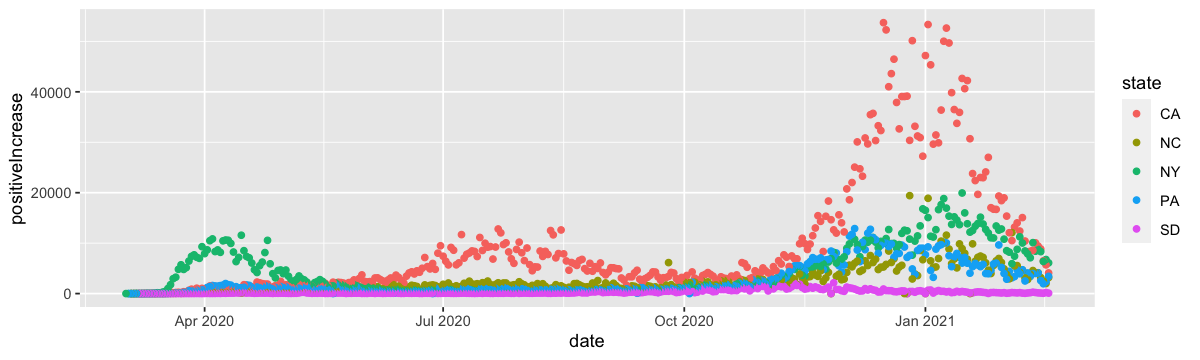

In [10]:
ggplot(data_sub,aes(x=date,y=positiveIncrease,color=state)) + geom_point()

**Q3.** Add a line geometry to the same plot to make it even more clear

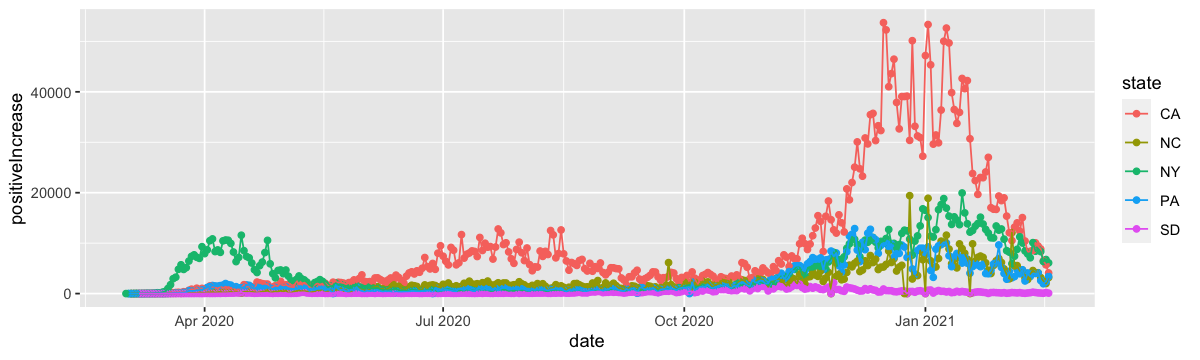

In [11]:
ggplot(data_sub,aes(x=date,y=positiveIncrease,color=state)) + geom_point() + geom_line()

The number of positive cases will strongly depend on the number of tests performed, next we will take a look at the number of tests performed as a function of time in each of the 5 states.

**Q4.** Using a similar structure as the plot above, examine the number of tests (totalTestResultsIncrease) as a function of date.

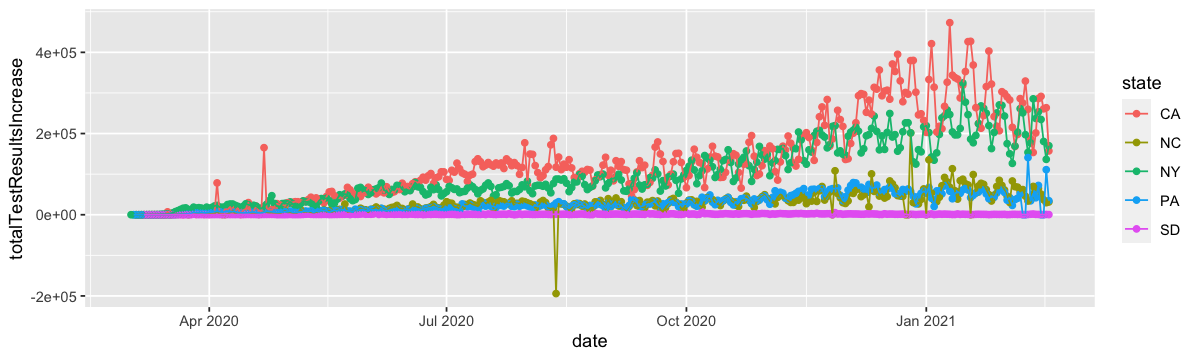

In [13]:
ggplot(data_sub,aes(x=date,y=totalTestResultsIncrease,color=state)) + geom_point() + geom_line()

You can see that the number of tests have been more or less increasing during the pandemic. An important measure that has been suggested as an estimae for the severity of the pandemic across regions is the precent positive tests. Use the code below to add a new variable precentPositive.

In [14]:
data_sub$precentPositive = data_sub$positiveIncrease/data_sub$totalTestResultsIncrease

**Q5.** Now plot change in precent positive tests.

Warning message:
“Removed 24 rows containing missing values (geom_point).”
Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


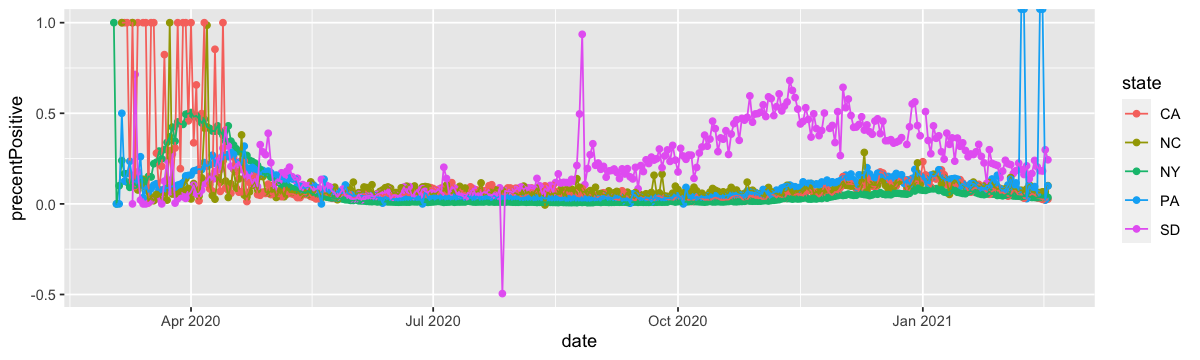

In [15]:
ggplot(data_sub,aes(x=date,y=precentPositive,color=state)) + geom_point() + geom_line()

What just happened to South Dekota?!

Note the outliers and the warning message, we probably should have filtered the data before starting, we will get back to this as part of the homework.

One question that is on everyones mind is how likely it is, for an infected case, to be fatal.

To investigate that, will examine the Incidence Fatality Rate (IFR): what is the precentage of reported cases that result in death. For this we will create a new table that contains the cummulative number of confirmed cases and deaths for all states that this data is reported.

Use the code below to generate such table.

In [26]:
data_for_ifr <- data %>% filter(date == '2021-02-17') %>% select('state','positiveCasesViral','death')
head(data_for_ifr)

state,positiveCasesViral,death
<chr>,<int>,<int>
AK,NA,288
AL,378785,9346
AR,248855,5313
AS,NA,0
AZ,747370,15063
CA,3416147,47507


**Q6.** Build a plot to compare the total infected (positiveCasesViral) to total death (death), this time also save the plot object as a variable p

(You will get a warning message, as some states have not reported these numbers on Feb 17, make sure you understand what the warning message means.)

Warning message:
“Removed 14 rows containing missing values (geom_point).”


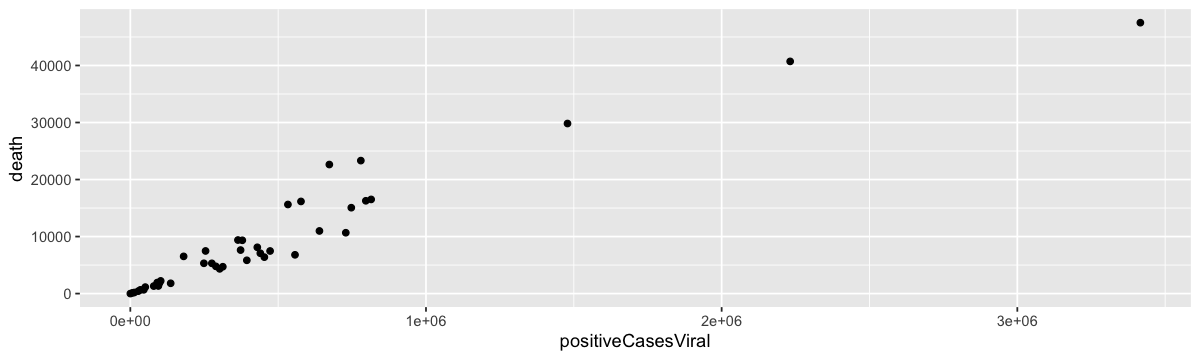

In [28]:
p = ggplot(data_for_ifr,aes(x=positiveCasesViral,y=death)) + geom_point()
p

Wouldn't it be nice to know which state is represented in each data point?

Using ggplot we can easily annotate the plot by adding another geometry, text, to the already existing plot object, use the code below to annotate the previous graph. We are also adding a regression line to fit the data, as the slope of this line can give us a rough idea of the IFR.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text).”


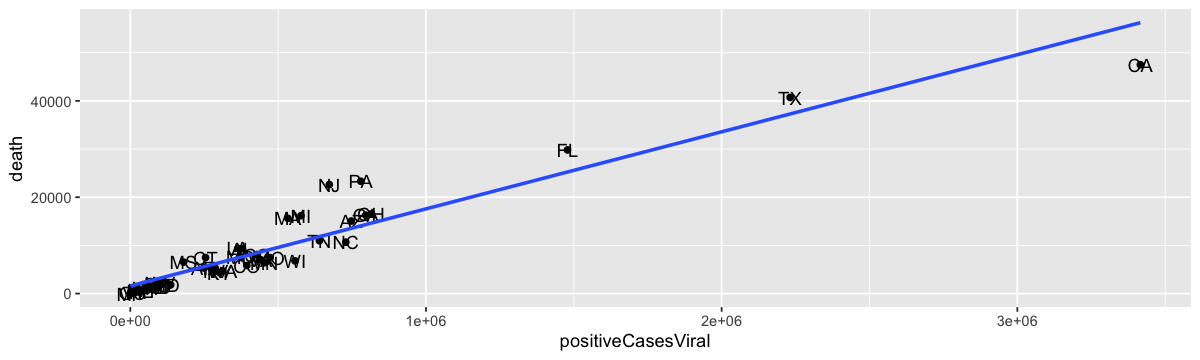

In [29]:
p + geom_text(aes(label=state)) + geom_smooth(method = "lm", se = FALSE)

**Q7.** To better highlight the text, color it in red. Add text color to the code above. Note that this is not an aesthetic mapping! So should not be defined within the aes parentheses.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 14 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_text).”


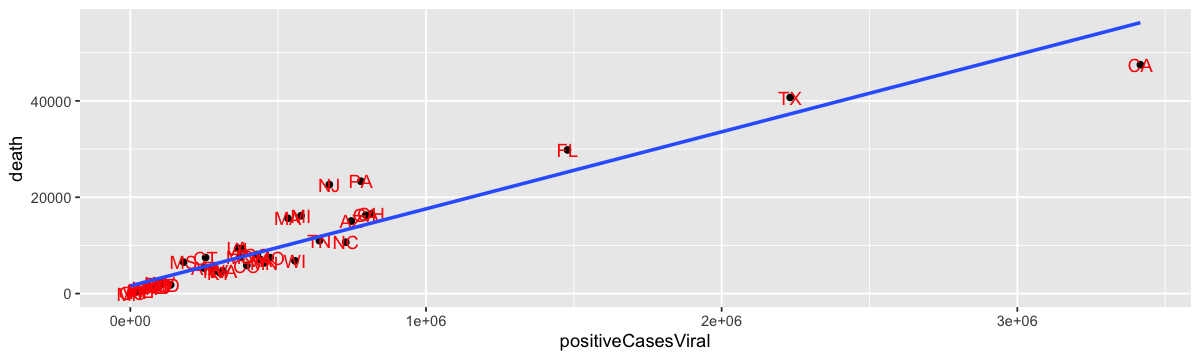

In [30]:
p + geom_text(aes(label=state),color='red') + geom_smooth(method = "lm", se = FALSE)

Last thing, we would like to extract the slope of the fitted line, to get some estimate of the IFR. Unfourtunatly it is not trivial to get this parameters from the fitted line in geom_smooth, so as a preview to some of our future classes, we will directly calculate a regression line on the data and take a look at the fitted parameters using the code below.

In [31]:
ft <- lm(death ~ positiveCasesViral,data = data_for_ifr)
summary(ft)


Call:
lm(formula = death ~ positiveCasesViral, data = data_for_ifr)

Residuals:
   Min     1Q Median     3Q    Max 
 -8729  -1647  -1290   1787  10277 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.588e+03  6.629e+02   2.395   0.0214 *  
positiveCasesViral 1.600e-02  8.493e-04  18.836   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3402 on 40 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.8987,	Adjusted R-squared:  0.8962 
F-statistic: 354.8 on 1 and 40 DF,  p-value: < 2.2e-16


Can you identify the slope parameter? What is the IFR that we got? Does that fit what you know about COVID-19?

Don't stress out :) This is most probably much higher than the real IFR due to under reporting of cases....

## Homework

Remember the plot from Q5? It had some weird values that are most probably due to incomplete or wrong reporting at specific days. Filter the table used in Q5 and replot the graph to get rid of the outliers and the warning messages. Follow these steps:

(1) Filter data_sub to show only the rows resulting in outlier precentPositive values. When you look at the figure generated in Q5 you will see two types of outliers, very high precentPositive values and negative values. Filter data_sub (using an OR operator) to show only lines where precentPositive is larger than 0.8 or smaller than 0.

(2) Now we see what is wrong, positiveIncrease should always be smaller than totalTestResultsIncrease (you cannot have more positive results than actual tests!). In many cases these two variables have the same value which is obviously a mistake in reporting. Filter data_sub to make sure that totalTestResultsIncrease is greater than positiveIncrease.

(3) Redo Q5 with your filtered data

date,state,positiveIncrease,totalTestResultsIncrease,death,positiveCasesViral,precentPositive
<date>,<chr>,<int>,<int>,<int>,<int>,<dbl>
2021-02-15,PA,1945,0,23119,775305,Inf
2021-02-14,PA,2571,0,23096,773614,Inf
2021-02-08,PA,2504,0,22471,756525,Inf
2021-02-07,PA,4717,0,22467,754240,Inf
2020-08-26,SD,292,312,162,NA,0.935897436
2020-08-12,NC,1166,-194215,2249,139061,-0.006003656
2020-07-27,SD,49,-99,123,NA,-0.494949495
2020-04-13,CA,554,554,687,NA,1.000000000
2020-04-10,CA,1163,1363,541,NA,0.853264857


[1] 1755    7

[1] 1706    7

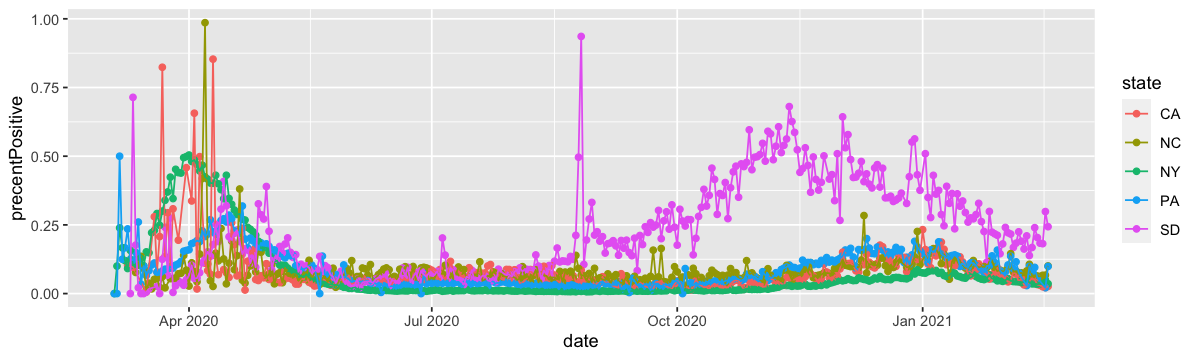

In [36]:
data_sub %>% filter((precentPositive > 0.8)|(precentPositive < 0))
data_sub_filt <- data_sub %>% filter(positiveIncrease < totalTestResultsIncrease)
dim(data_sub)
dim(data_sub_filt)
ggplot(data_sub_filt,aes(x=date,y=precentPositive,color=state)) + geom_point() + geom_line()